We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [18]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-13 12:12:17--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.89, 13.227.223.78, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458281 (448K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 447.54K  --.-KB/s    in 0.09s   

2020-04-13 12:12:18 (4.71 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [458281/458281]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [19]:
import pandas as pd
import numpy as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [20]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-13,13,4,2020,52,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-12,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-11,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
5,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
6,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
7,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
8,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
9,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0


Use a count on columns to see how many missing values we have. We would like to compare countries by geoId.

In [21]:
df.count()

dateRep                    10537
day                        10537
month                      10537
year                       10537
cases                      10537
deaths                     10537
countriesAndTerritories    10537
geoId                      10507
countryterritoryCode       10328
popData2018                10369
dtype: int64

Because we seem to miss some geoID entries, we will drop them. The resulting dataframe will be pivoted so we get one row per date, columns by geoId and the number of new cases and deaths in the cells. Again, show the first 10 rows to check our pivot.

In [22]:
df_geo = df.dropna().pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo.head(10)

cases                                           ... deaths          \
geoId         AD   AE   AF  AG  AL   AM  AO  AR   AT   AU  ...     VC  VE  VG   
dateRep                                                    ...                  
2019-12-31   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-05   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-06   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-07   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-08   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   
2020-01-09   NaN  0.0  0.0 NaN NaN  0.0 NaN NaN  0.0  0.0  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
dateRep                                  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-05 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-06 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-07 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-08 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-09 NaN  0.0 NaN NaN NaN NaN NaN  

[10 rows x 398 columns]

Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to see what's there.

In [23]:
df_geo.describe()

cases                                                          \
geoId         AD          AE         AF         AG         AL         AM   
count  31.000000   99.000000  95.000000  25.000000  36.000000  96.000000   
mean   20.580645   41.646465   6.389474   0.840000  12.388889  10.552083   
std    12.878339  106.255594  13.977409   1.624808   8.128531  19.666627   
min     0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   
25%    12.000000    0.000000   0.000000   0.000000   5.750000   0.000000   
50%    20.000000    0.000000   0.000000   0.000000  11.000000   0.000000   
75%    29.000000    8.500000   2.500000   1.000000  17.000000  11.750000   
max    43.000000  481.000000  61.000000   6.000000  29.000000  92.000000   

                                                       ... deaths             \
geoId         AO          AR           AT          AU  ...     VC         VE   
count  23.000000   38.000000   105.000000  105.000000  ...   21.0  30.000000   
mean    0.826087   58.105263   132.733333   60.209524  ...    0.0   0.300000   
std     1.154130   54.031917   237.439153  125.448863  ...    0.0   0.651259   
min     0.000000    0.000000     0.000000    0.000000  ...    0.0   0.000000   
25%     0.000000    9.500000     0.000000    0.000000  ...    0.0   0.000000   
50%     0.000000   48.000000     0.000000    1.000000  ...    0.0   0.000000   
75%     1.500000   87.000000   205.000000   52.000000  ...    0.0   0.000000   
max     4.000000  186.000000  1141.000000  611.000000  ...    0.0   2.000000   

                                                                                
geoId    VG         VI     VN         XK   YE         ZA         ZM         ZW  
count  18.0  20.000000  101.0  29.000000  4.0  37.000000  26.000000  24.000000  
mean    0.0   0.050000    0.0   0.241379  0.0   0.675676   0.076923   0.125000  
std     0.0   0.223607    0.0   0.635563  0.0   1.375461   0.271746   0.337832  
min     0.0   0.000000    0.0   0.000000  0.0   0.000000   0.000000   0.000000  
25%     0.0   0.000000    0.0   0.000000  0.0   0.000000   0.000000   0.000000  
50%     0.0   0.000000    0.0   0.000000  0.0   0.000000   0.000000   0.000000  
75%     0.0   0.000000    0.0   0.000000  0.0   1.000000   0.000000   0.000000  
max     0.0   1.000000    0.0   2.000000  0.0   6.000000   1.000000   1.000000  

[8 rows x 398 columns]

Get to know your data by visualization, in this case the number of new cases per day for my home country.

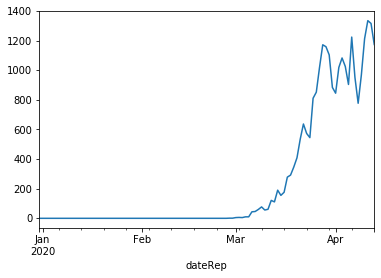

In [24]:
df_geo['cases']['NL'].plot()

What would China look like?

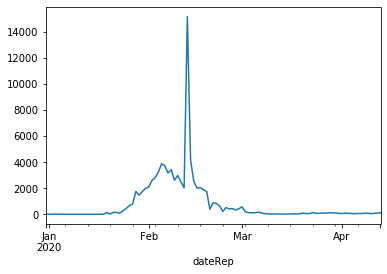

In [25]:
df_geo['cases']['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases.

To see the growth in number of cases, we can use cumulative sum, in this case we show CN and NL.

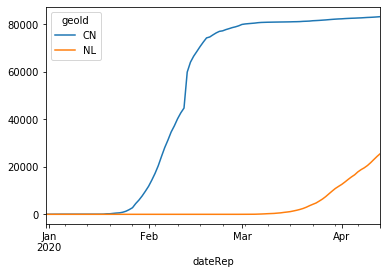

In [26]:
df_geo['cases'][['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


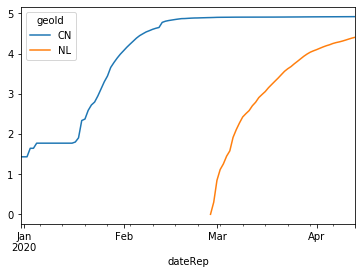

In [27]:
np.log10(df_geo['cases'][['CN', 'NL']].cumsum()).plot()

This clearly shows the phases in CN, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For NL we are still at the phase where measures start to take effect. Also, no real startup curve there.

Perhaps some other countries also show this effect.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


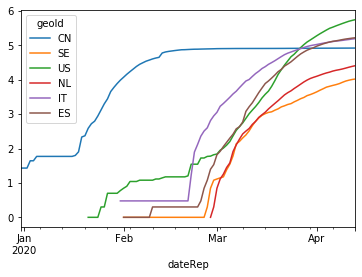

In [28]:
np.log10(df_geo['cases'][['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum()).plot()

Another interesting measure would be relative growth in number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the loc method.

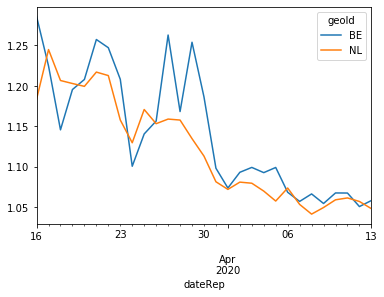

In [29]:
(df_geo.cumsum() / df_geo.shift().cumsum())['cases'][['BE', 'NL']].loc['20200316':].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double by some logarithmic magic. For NL the number doubled every one or two days in the beginning but now it doubles in over 10 days, which is a good sign.

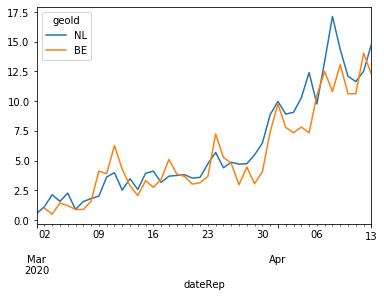

In [30]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))['cases'][['NL', 'BE']].loc['20200301':].plot()

Rolling window functions can be used to smooth a curve, in this case the moving 5 day mean new cases for NL and BE.

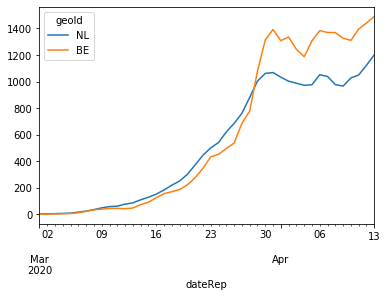

In [31]:
df_geo['cases'][['NL', 'BE']].rolling(5).mean().loc['20200301':].plot()

The default window function is a rectangle, where all values are weighed equally. Using another window function will weigh the values in the window differently, such as the triangle function which will focus more on the values in the center of the window.

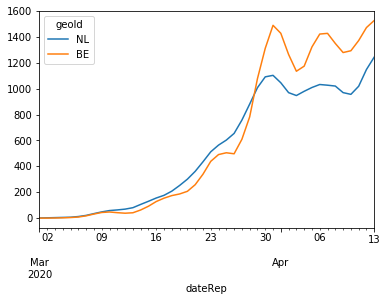

In [32]:
df_geo['cases'][['NL', 'BE']].rolling(5, win_type='triang').mean().loc['20200301':].plot()

Let's look at 'the curve' which we are supposed to flatten. It shows the number of active cases (the Infected category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently 15 is used by EU CDC), so we only sum new cases from the last 14 days. By leaving out older infections (the Removed category in SIR) this shows us the current number of infections. China is clearly through their (first) curve. Italy and Spain seem to be over the top.
We use a triangular window to mimic the natural spread in recovery so we need to multiply our number by 2 because a triangle is only half the surface of the rectangular window that contains all current cases.

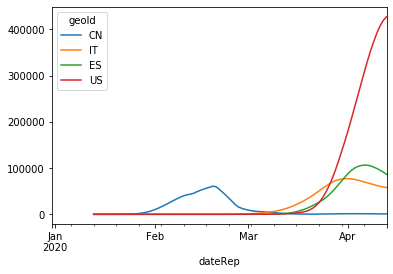

In [36]:
(df_geo['cases'][['CN', 'IT', 'ES', 'US']].rolling(14, win_type='triang').sum() * 2).plot()

Assuming that we see about 10% of currently infected in ICU, we can monitor the capacity with the following graph. The number is divided by 5 because of the 10% factor and doubling again for the triangle window.

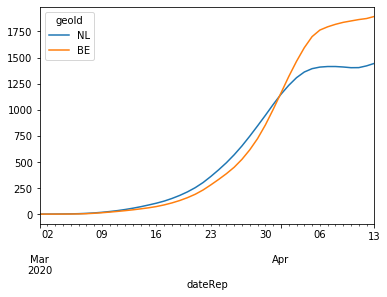

In [38]:
(df_geo['cases'][['NL', 'BE']].rolling(14, win_type='triang').sum().loc['20200301':] / 5).plot()

For NL this more or less corresponds with the official ICU data, for BE it overestimates a bit.

Keep exploring! Stay home, wash your hands, keep your distance.